## Advanced Lane Finding Project

The goals / steps of this project are the following:

* **Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**
* **Apply a distortion correction to raw images.**
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [2]:
import os
import numpy as np
import cv2
import glob
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')
# Set output chessboard corners dir
out_dir = './output_images/chessboard_corners/'

In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        # store img with corner drawn
        image_name=os.path.split(fname)[1]
        out_path = os.path.join(out_dir, image_name)
        cv2.imwrite(out_path, img)
    else:
        print('could not found points at ' + os.path.split(fname)[1])

# cv2.destroyAllWindows()

could not found points at calibration4.jpg
could not found points at calibration1.jpg
could not found points at calibration5.jpg


Text(0.5,1,'Undistorted Image')

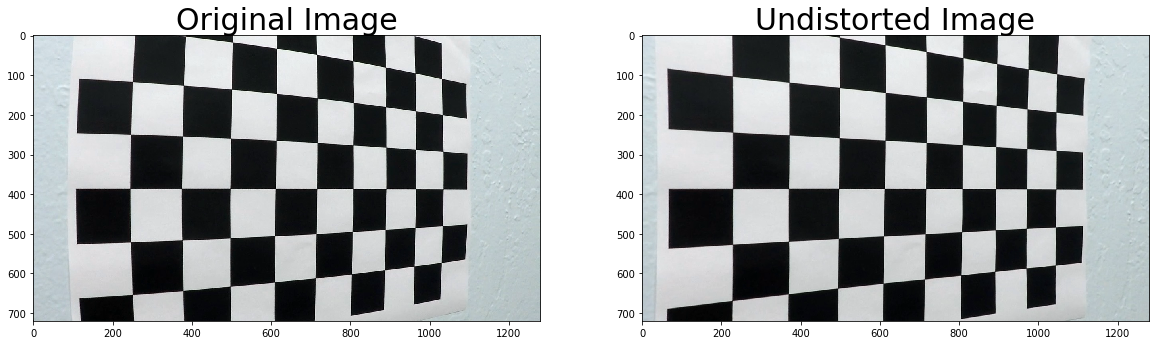

In [9]:
# Test undistortion on an calibration image
img = cv2.imread('camera_cal/calibration5.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [6]:
# Save the camera calibration matrix
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open("./camera_cal/camera_calibration_mat.p", "wb" ) )

In [7]:
# Set output undistortion dir
out_dir = './output_images/camera_undistortion/'

# Load undistortion matrix
with open('./camera_cal/camera_calibration_mat.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]

# Save undistorted camera images
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    # Do undistortion
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    # Save undistorted images
    image_name=os.path.split(fname)[1]
    out_path = os.path.join(out_dir, image_name)
    cv2.imwrite(out_path,dst)